In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
from sklearn.datasets import make_blobs ## Library for creating datasets

In [42]:
data = make_blobs(n_samples = 300,
                  n_features = 2,
                  centers = 2,
                  cluster_std = 1.0,
                  random_state = 101
                 )

In [43]:
X,y = data

In [44]:
## adding noise
np.random.seed(seed = 101)
z_noise = np.random.normal(size = len(X))
z_noise = pd.Series(z_noise)

In [45]:
feat = pd.DataFrame(X)

In [46]:
feat= pd.concat([feat,z_noise],axis = 1)

In [47]:
feat.columns = ['X1','X2','noise']

                

In [48]:
plt.scatter(feat['X1'],feat['X2'],c=y)

In [49]:
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D

In [50]:
%matplotlib notebook

<IPython.core.display.Javascript object>


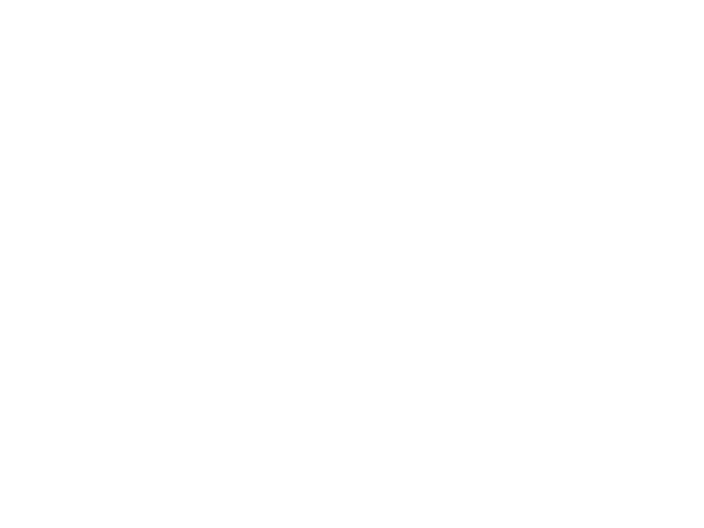

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(feat['X1'],feat['X2'],feat['noise'],c=y)



In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [62]:
from tensorflow.keras.optimizers import SGD

In [63]:
encoder = Sequential()
encoder.add(Dense(units = 2, activation = 'relu',input_shape = [3]))


In [64]:
decoder = Sequential()
decoder.add(Dense(units = 3,activation = 'relu',input_shape = [2]))

In [65]:
autoencoder = Sequential([encoder,decoder])

In [66]:
autoencoder.compile(loss = 'mse',optimizer = SGD(lr = 1.5))

In [67]:
from sklearn.preprocessing import MinMaxScaler

In [68]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(feat)

In [70]:
autoencoder.fit(scaled,scaled,epochs = 20)

Train on 300 samples
Epoch 1/20
300/300 [==============================] - 0s 657us/sample - loss: 0.2653
Epoch 2/20
300/300 [==============================] - 0s 37us/sample - loss: 0.2499
Epoch 3/20
300/300 [==============================] - 0s 33us/sample - loss: 0.2494
Epoch 4/20
300/300 [==============================] - 0s 43us/sample - loss: 0.2494
Epoch 5/20
300/300 [==============================] - 0s 43us/sample - loss: 0.2490
Epoch 6/20
300/300 [==============================] - 0s 50us/sample - loss: 0.2486
Epoch 7/20
300/300 [==============================] - 0s 37us/sample - loss: 0.2488
Epoch 8/20
300/300 [==============================] - 0s 43us/sample - loss: 0.2488
Epoch 9/20
300/300 [==============================] - 0s 47us/sample - loss: 0.2485
Epoch 10/20
300/300 [==============================] - 0s 43us/sample - loss: 0.2488
Epoch 11/20
300/300 [==============================] - 0s 43us/sample - loss: 0.2494
Epoch 12/20
300/300 [==============================]

In [71]:
encoded_2dim = encoder.predict(scaled)

In [72]:
encoded_2dim

array([[0.        , 0.43419364],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.17902803],
       [0.        , 0.22316429],
       [0.        , 0.01767111],
       [0.        , 0.        ],
       [0.        , 0.19618747],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.09261537],
       [0.        , 0.02740122],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.18238696],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.13864681],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.14323243],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.21080413],
       [0.        , 0.133979  ],
       [0.

<IPython.core.display.Javascript object>


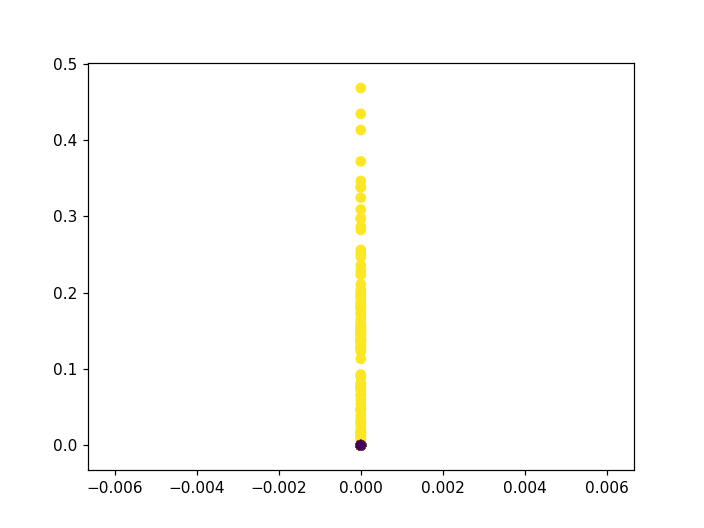

In [73]:
plt.scatter(encoded_2dim[:,0],encoded_2dim[:,1],c=y)